In [30]:
import numpy
import random as rand
import matplotlib.pyplot as plt

## **Implementation of k-armed bandit problem**
Good exercise to see Exploration x Exploitation trade-off in practice.
This method uses the average action reward recieved to estimate the values of q*(a)

In [31]:
class k_armed_bandit:
    def __init__(self, k: int):
        self.k=k

    def simulate(self, epsilon: list | float, steps: int, runs: float):
        #TREATING EPSILON TYPE
        try:
            iter(epsilon)
        except TypeError:
            epsilon = list(epsilon)

        self.epsilon = numpy.array(epsilon)
        self.steps = steps
        self.runs = runs
        self.opt_action_mean = numpy.array([numpy.zeros(steps) for _ in range(len(epsilon))])
        self.reward_mean = numpy.array([numpy.zeros(steps) for _ in range(len(epsilon))])
        self.estimates_mean = numpy.array([numpy.zeros(self.k) for _ in range(len(epsilon))])

        #MEAN ACTION REWARD FUNCTION
        def av_estimate(q_est, q_count, new_reward):
            return ((q_est*(q_count-1))+new_reward)/q_count
        
        for e_i in range(len(epsilon)):
            for _ in range(runs):
                q_star = numpy.random.normal(0, 1, self.k) #REAL REWARDS
                q_estimates = [0 for _ in range(self.k)] #REWARDS ESTIMATES
                q_counter = [0 for _ in range(self.k)] # REWARD COUNTER
                opt_action = numpy.argmax(q_star)

                for step in range(steps):
                    if rand.random() < epsilon[e_i]: #EXPLORATORY ACTION TAKEN
                        action_chosen = rand.randint(0,len(q_estimates)-1)

                    else: #GREEDY ACTION TAKEN
                        best_value = max(q_estimates)
                        best_actions = [i for i, q in enumerate(q_estimates) if q == best_value]
                        action_chosen = rand.choice(best_actions)

                    if action_chosen == opt_action: # MEAN COUNT OPTIMAL ACTION WAS CHOSEN AT GIVEN TIMESTEP
                        self.opt_action_mean[e_i][step] += 1/runs

                    reward = numpy.random.normal(q_star[action_chosen], 1, 1).item()

                    self.reward_mean[e_i][step] += reward/runs # MEAN REWARD AT GIVEN TIMESTEP

                    q_counter[action_chosen] += 1
                    q_estimates[action_chosen] = av_estimate(q_estimates[action_chosen], q_counter[action_chosen], reward)

            for qi in range(self.k): #MEAN ESTIMATE REWARD VALUES
                self.estimates_mean[e_i][qi] += q_estimates[qi]/runs

In [32]:
kab = k_armed_bandit(10) 
kab.simulate([0, 0.01, 0.1], 1000, 2000)

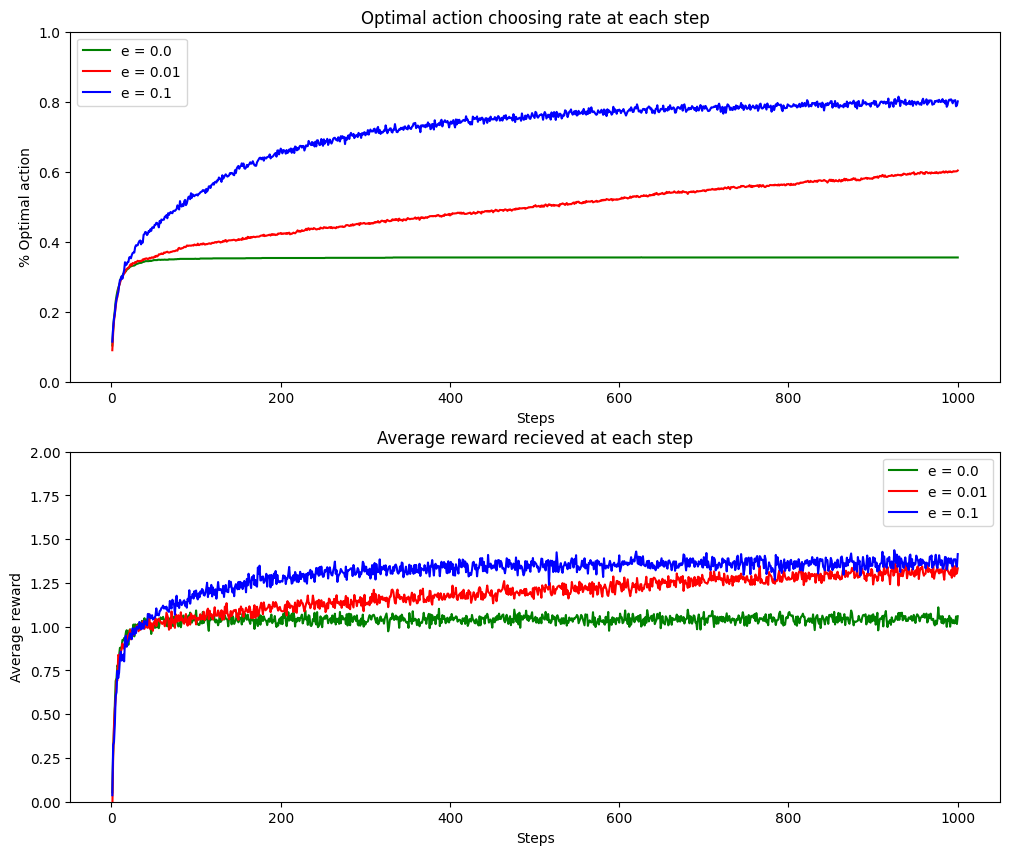

In [34]:
fig, axs = plt.subplots(2, 1, figsize=(12,10))

colors = ['green', 'red', 'blue']

for e_i in range(len(kab.epsilon)):
    axs[0].plot(range(1, kab.steps + 1), kab.opt_action_mean[e_i], color=colors[e_i])
    axs[1].plot(range(1, kab.steps + 1), kab.reward_mean[e_i], color=colors[e_i])

axs[0].set_ylim(0, 1)
axs[0].set_title('Optimal action choosing rate at each step')
axs[0].set_ylabel('% Optimal action')
axs[0].set_xlabel('Steps')
axs[0].legend([f'e = {kab.epsilon[i]}' for i in range(len(kab.epsilon))])

axs[1].set_ylim(0, 2)
axs[1].set_title('Average reward recieved at each step')
axs[1].set_ylabel('Average reward')
axs[1].set_xlabel('Steps')
axs[1].legend([f'e = {kab.epsilon[i]}' for i in range(len(kab.epsilon))])

plt.show()